# Imports

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Settings

In [2]:
### SETTINGS ###

nTrainSamples = 1000 # number of learning samples
nTrainSteps   = 100  # number of training steps
alpha = 0.25         # learning rate
nTestSamples = 1000  # number of testing samples

xSeg = 3 # number of x segments
ySeg = 2 # number of y segments

nClasses = xSeg * ySeg

xSegWidth = 1.0 / xSeg # the width of x segment
ySegWidth = 1.0 / ySeg # the width of y segment

# Training sample

In [3]:
def getClass (x): # return class id
    xId = int(x[0] / xSegWidth)
    yId = int(x[1] / ySegWidth)
    return xSeg * yId + xId

X = (np.random.sample((nTrainSamples, 2))) # random X in [0,1]x[0,1]
Y = np.array([getClass(x) for x in X])     # expected class id

# Plot training sample

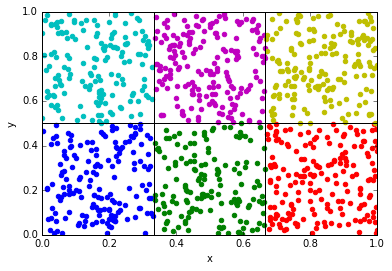

In [4]:
%matplotlib inline

# 6 different colors, use the same if nClasses > 6
colors = ['b', 'g', 'r', 'c', 'm', 'y'] * (nClasses / 6 + 1)

# axis settings

plt.xlabel('x')
plt.ylabel('y')

plt.xlim([0,1])
plt.ylim([0,1])

# draw segments borders

for i in range(xSeg):
    plt.plot ([(i + 1) * xSegWidth] * 2, [0, 1], color = 'k')

for i in range(ySeg):
    plt.plot ([0,1], [(i + 1) * ySegWidth] * 2, color = 'k')

for i in range(nClasses):
    points = []
    for j in range(nTrainSamples):
        if getClass(X[j]) == i: points.append(X[j])
    plt.scatter (*zip(*points), color = colors[i])

# Create hdf5

In [5]:
f = h5py.File("multiclass_caffe.hdf5", 'w')

data = f.create_dataset("data", (nTrainSamples, 2), dtype='f')
label = f.create_dataset("label", (nTrainSamples,), dtype='i')

data[...] = X
label[...] = Y

f.close()

# Test

In [6]:
o = h5py.File("multiclass_caffe.hdf5", 'r')

D = o['data']
L = o['label']

print (L[...] == Y).all()
print (D[...] == X).all()

print X
print D[...]

True
False
[[ 0.68961896  0.56769605]
 [ 0.80393271  0.6939275 ]
 [ 0.47339829  0.27398468]
 ..., 
 [ 0.51289913  0.33744902]
 [ 0.90009987  0.91507265]
 [ 0.05131856  0.69210228]]
[[ 0.68961895  0.56769603]
 [ 0.80393273  0.69392747]
 [ 0.4733983   0.27398467]
 ..., 
 [ 0.5128991   0.33744901]
 [ 0.90009987  0.91507268]
 [ 0.05131856  0.69210225]]


# Create testing samples

In [7]:
X = (np.random.sample((nTrainSamples, 2))) # random X in [0,1]x[0,1]
Y = np.array([getClass(x) for x in X])     # expected class id

f = h5py.File("multiclass_caffe_test.hdf5", 'w')

data = f.create_dataset("data", (nTrainSamples, 2), dtype='f')
label = f.create_dataset("label", (nTrainSamples,), dtype='i')

data[...] = X
label[...] = Y

f.close()